In [1]:
%matplotlib notebook
import horse_chase

#### Chasing the Horse ~
**Initial Location** : The Horse starts at `[0,0]` every episode. The Cowboy starts at a random point on the grid.

**Chase** : Chase terminates when Cowboy meets Horse, with `+10` reward. Until then, there is `-1` reward every time-step. Each chase is a terminating episode.

#### Movement ~
**Horse** picks a random direction and moves one-step, then turns left/right and takes another step.

**Cowboy** takes one step in a random direction every time-step.

If Horse/Cowboy step out of the boundary, they're pushed back in.

In [10]:
# TD-alpha learning from 5000 episodes
states = horse_chase.TD_Lambda(5000, alpha=0.0005)

100%|██████████| 5000/5000 [03:29<00:00, 23.88it/s]


<IPython.core.display.Javascript object>


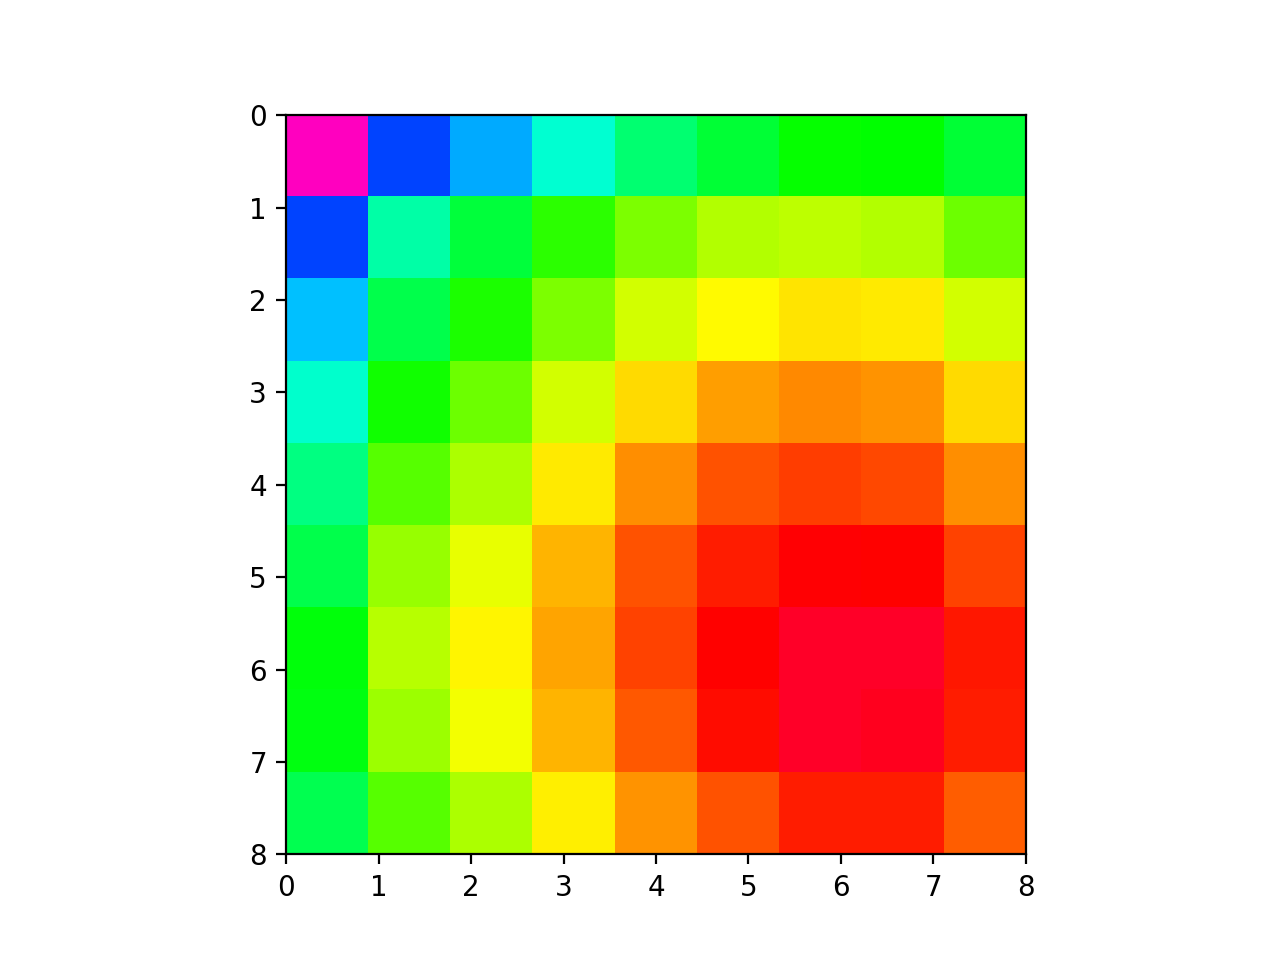

In [25]:
# Almost-converged value function 
horse_chase.c_plot(states) # Warmer colors (Red) are lower-value

<IPython.core.display.Javascript object>


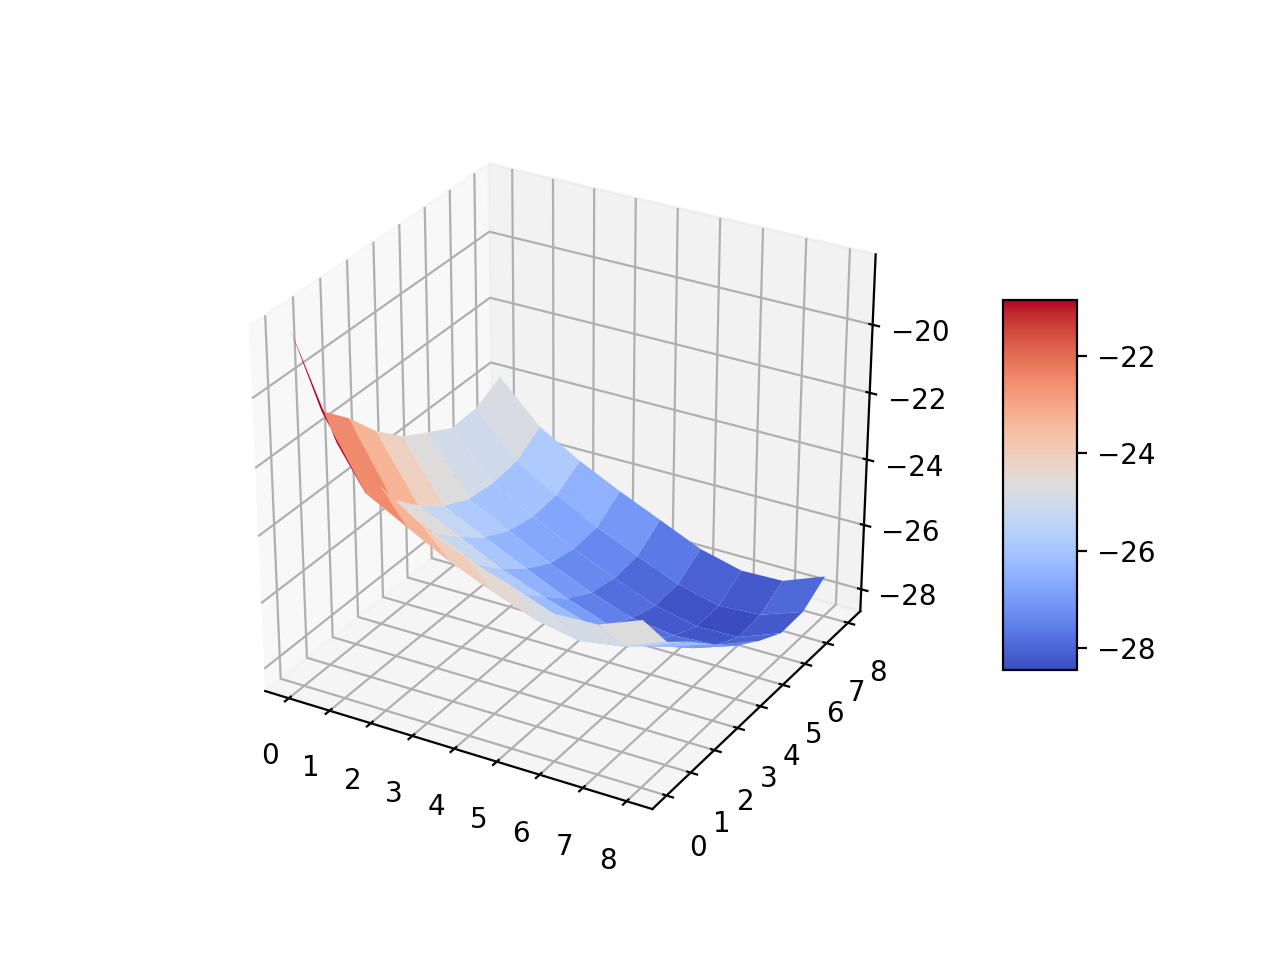

In [17]:
horse_chase.plot(states) # Interactive surface plot
# Open in a jupyter

#### What do values and rewards mean, here?
**Values** : The value of a state *S* is the return that you can expect to accumulate from *t* to *T*, given you're at *S* at *t*. 

**Rewards** : Since this is an undiscounted process with negative reward every time-step, cowboy tries to minimize the time taken to catch the horse. 

#### Why does the value function look like that?
The cowboy wants to catch the horse fast, so it's beneficial to be closest to horse's starting position, `[0,0]`. Moreover, it is benficial for the cowboy to be closer to the boundary, because at the boundary the horse's movement is constrained. This is also why there is a small rise at `[8,8]`
<br/><br/>
### Notes : 

##### Discount
When I tried this with a discounted reward, convergence properties were really bad. Could be because the cowboy chases the horse for so long that old rewards are heavily discounted, and so there is no longer much incentive to minimize the time.

##### Deepcopy
When copying n-D arrays in Python, using `copy()` just copies the pointers to the nested lists. `deepcopy()` creates distinct copies of all values.